# SMAI Assignment - 2

## Question - `1` : Clustering

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

**About the dataset:**
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image. You can check out the dataset here: https://www.kaggle.com/datasets/zalando-research/fashionmnist

1a) Load the dataset and use the K Means algorithm **(You are allowed to use the library)**. You need to find the optimal number of clusters using the
> i) elbow method
    >> Plot the graph between average distance and the number of clusters graph while using the elbow method. Report the optimal number of clusters found. Implement this method on your own.

> ii) silhoette method
    >> Plot the graph between silhoutte score and number of clusters using silhoette method. Report the optimal number of clusters found. You can use the functions provided by sklearn.metrics.

1b) Experiment with different cluster initialisation methods [k-means++, forgy ("random" in sklearn)]. (init parameter in KMeans class) 


1c) Visualize the dataset to depict the clusters formed. Here you can leverage methods like PCA to reduce the data to 2-3 dimensions and visualize using scatter plots. Color the points according to the clusters (you can use T-SNE or any other matplotlib method)

</br>
</br>
</br>
</br>


**Part 2:**
</br>
In this task, you need to implement Hierarchical clustering (agglomerative) on the same dataset.

2a) visualize a dendogram and find out the optimal number of clusters with the help of Dendogram. Explain the procedure.


2b) Implement Hierarchical clustering using: </br>
> i) single linkage

> ii) Complete linkage

Visualize the clusters obtained using these linkages and compare. 

</br>
</br>
</br>
</br>

**Part 3:**
</br>
In this part, we’ll implement kmeans to compress an image. In an original image each pixel has 3 8-bit integers, therefore the size of the image is **3 x height x width x 8**. Our task is to compress the image where it only comprises of **k** unique colors, where k = number of clusters formed by the algorithm where each pixel is a 3D datapoint. Therefore the new compressed image can be stored in **k x 24 + width x height x b**. (b -> number of bits used to represent the integer *k*, since each pixel will have a color value from 0 to k-1). Now your task is to experiment with different values of k (atleast 3) and show the compressed image along with the value of data reduction (in terms of bits). 

(an example image has been provided in the folder)

## Part1: K Means

In [1]:
 
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.metrics import  silhouette_score
from sklearn.manifold import TSNE

In [2]:
#implement elbow method from scratch

# Task part-01a1

def calculate_distance(X, cluster_centers_, labels_):
    dist=0
    #calculating the distance  for x from their clusters centroid.
    for i in range(X.shape[0]):
        # getting centroid index.
        center_index=labels_[i]
        #getting centroid.
        y=cluster_centers_[center_index]
        d = np.linalg.norm(X[i] - y)
        dist=dist+d
    return dist
def distortions(kmeanModel,X):
    dist=calculate_distance(X, kmeanModel.cluster_centers_,kmeanModel.labels_) / X.shape[0]
    return dist

def elbow(k,X):
    kmeanModel = KMeans(n_clusters=k,init='k-means++', n_init=10, max_iter=300).fit(X)
    return distortions(kmeanModel,X)  


In [3]:
#implement silhouette method from scratch

# Task part-01a2

def silhouette(k,X):
    kmeanModel = KMeans(n_clusters=k,init='k-means++', n_init=10, max_iter=300)
    cluster_labels=kmeanModel.fit_predict(X)
    #Calculating silhouette score.
    score = silhouette_score(X, cluster_labels)
    return score
def accuracy(y_test, y_pred):
    acc=np.sum(y_test == y_pred)/len(y_test)
    return acc

In [4]:
# LOADING THE DATASET. Take only the test split (10000 samples)
from keras.datasets import fashion_mnist
import numpy as np

(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
X = testX.reshape(testX.shape[0] , -1)
y = np.copy(testy)
tsne = TSNE(2)
X_tsne = tsne.fit_transform(X)
print("10K images flattened: " , X.shape , " and 10k labels: " , y.shape)



10K images flattened:  (10000, 784)  and 10k labels:  (10000,)


In [5]:
# Perform KMeans using sklearn's KMeans. (Perform appropriate scaling)
Sum_S_Dist=[]
scores=[]
clusters=[]
for k in range(2,21):
    clusters.append(k)
    Sum_S_Dist.append(elbow(k,X))
    scores.append(silhouette(k,X))
    
print("Optimal value of k : ", scores.index(max(scores)) + 2)

Optimal value of k :  2


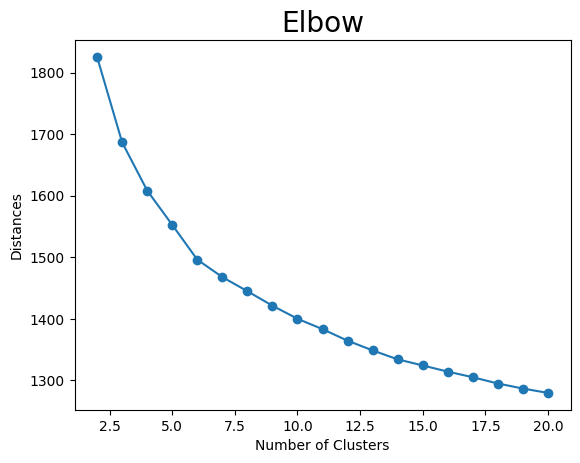

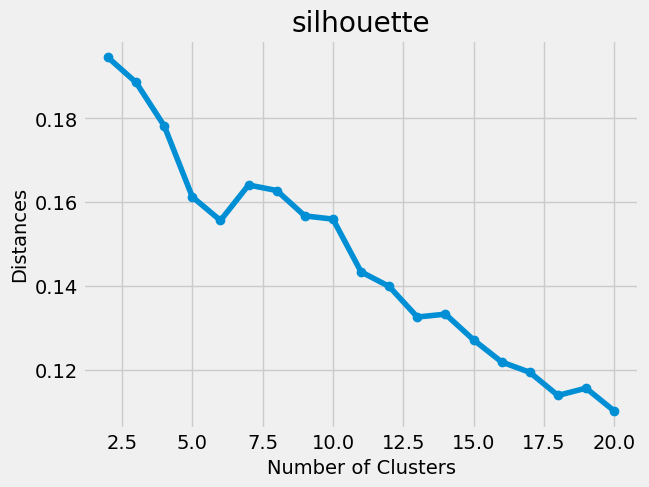

In [6]:
# Visualize the results from elbow method and silhoutte method. (Vary the value of k from around 2-3 to 20)
plt.plot(clusters, Sum_S_Dist, marker='o')
style.use("fivethirtyeight")
plt.xlabel('Number of Clusters')
plt.ylabel('Distances')
plt.title('Elbow')
plt.show()
plt.plot(clusters, scores, marker='o')
style.use("fivethirtyeight")
plt.xlabel('Number of Clusters')
plt.ylabel('Distances')
plt.title('silhouette')
plt.show()

In [7]:
# Task -01b
k=6
def Kmeans_(x,k,init_method):
    kmeanModel = KMeans(n_clusters=k,init=init_method, n_init=10, max_iter=300)
    cluster_labels=kmeanModel.fit_predict(x)
    score = silhouette_score(x, cluster_labels)
    return cluster_labels,score
    
cluster_labels_kmeans,score_kmeans=Kmeans_(X,k,"k-means++")
cluster_labels_random, score_random=Kmeans_(X,k,"random")

print("Score in Kmeans++ method : ",score_kmeans)
print("Score in random method : ",score_random)


Score in Kmeans++ method :  0.15566305462441482
Score in random method :  0.15550271372853508


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


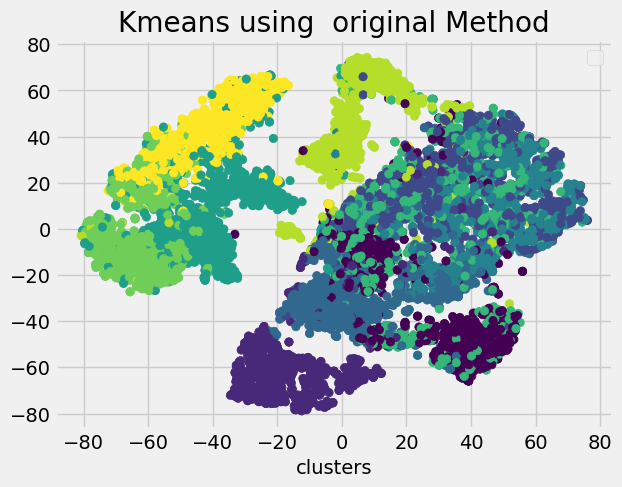

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


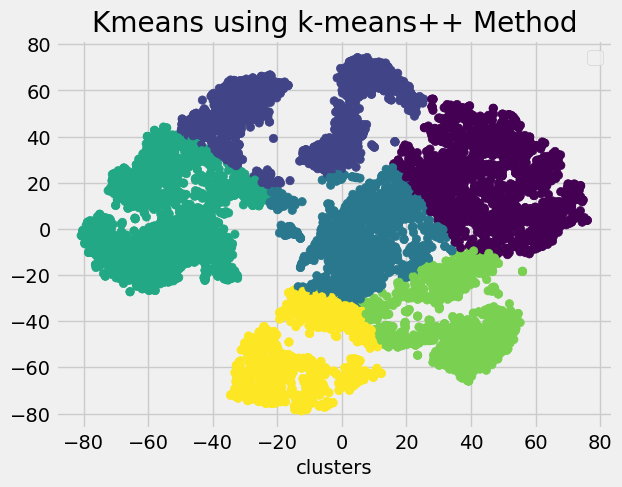

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


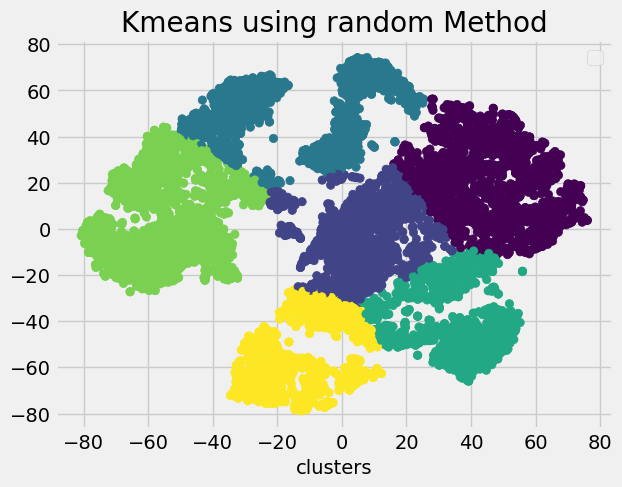

In [8]:
# Visualize the clusters formed by Kmeans (Use PCA to reduce dimensions and plot scatter plot. 

# Task Part-01c 

cluster_labels_kmeans,score_kmeans=Kmeans_(X_tsne,k,"k-means++")
cluster_labels_random, score_random=Kmeans_(X_tsne,k,"random")
def visualize_clusers(y_pred, method):
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = y_pred, cmap='viridis')  
    plt.title("Kmeans using "+method+ " Method")  
    plt.xlabel('clusters')  
    plt.legend()  
    plt.show() 
    
    
visualize_clusers(y, " original")

visualize_clusers(cluster_labels_kmeans, "k-means++")

visualize_clusers(cluster_labels_random, "random")

In [9]:
# You can show the original ground truth labels in one plot and then the predicted clusters in another plot)

## Part2: Hierarchical clustering

In [10]:
# implement hierarchical clustering ( you can use scikit module)
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc 
def hierarchical_clustering(X,n,lnkg):
    hc= AgglomerativeClustering(n_clusters=n, metric='euclidean', linkage=lnkg)  
    y_pred=hc.fit_predict(X)
    return y_pred

In [11]:
def dendogram(mthd):
    dendro = shc.dendrogram(shc.linkage(X, method=mthd))  
    plt.title("Dendrogram Plot with "+mthd+" method")  
    plt.xlabel("Clusters")  
    plt.show()

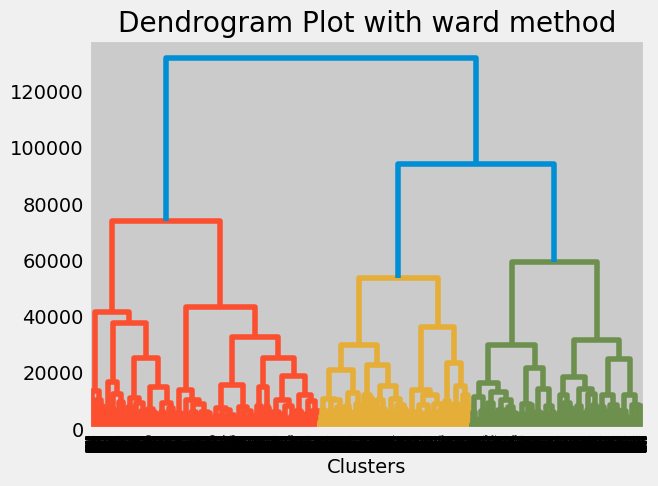

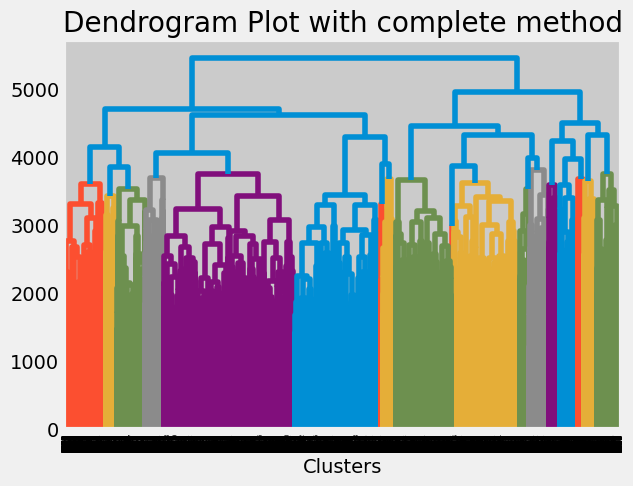

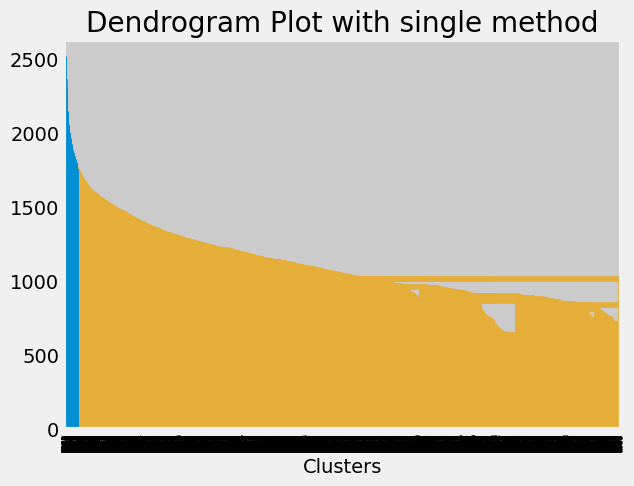

In [12]:
#visualize a dendogram
import sys
sys.setrecursionlimit(10000)
dendogram("ward")
dendogram("complete")
dendogram("single") 

**Question**: Explain the procedure to find the optimal number of clusters using dendogram

#### Answere : 
By Looking at the dendrogram and identifying the point where the addition of a new cluster results in a significant drop in the distance between the clusters. This point is called the "elbow" of the dendrogram, and it represents the optimal number of clusters.
</br>Just like the above procedure we can observe that the optimal number of clusters can be 2.
</br>
</br>





No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


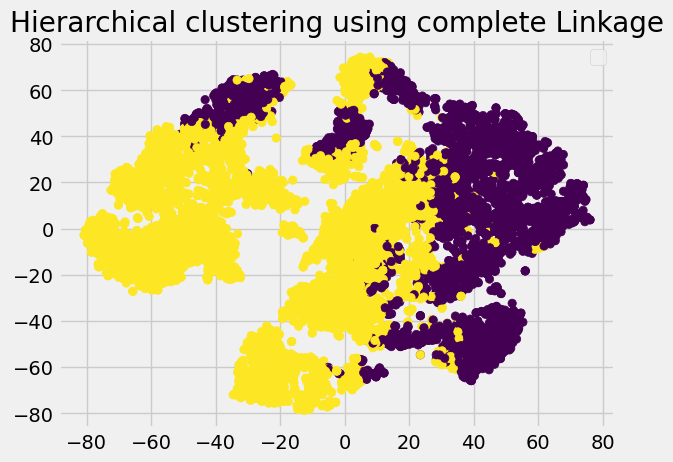

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


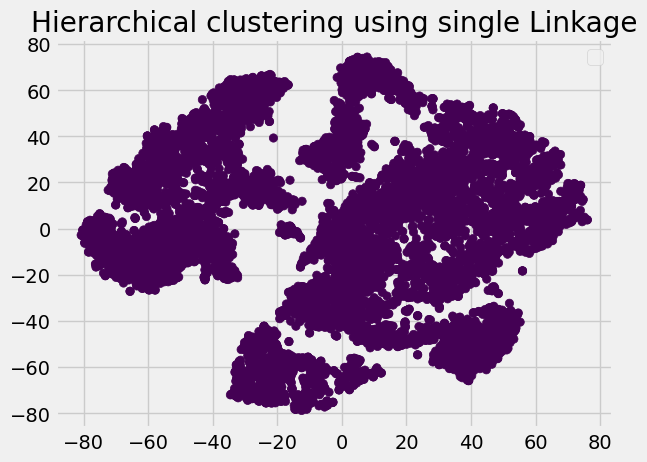

In [13]:
#visualisation of clusters using single linkage and complete linkage
k=2 
def visualize_clusers(y_pred, method):
   
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = y_pred, cmap='viridis') 
    plt.title("Hierarchical clustering using "+method+ " Linkage")  
    plt.legend()  
    plt.show() 

y_pred_c = hierarchical_clustering(X,k,'complete')
visualize_clusers(y_pred_c,"complete")
y_pred_s = hierarchical_clustering(X,k,'single')
visualize_clusers(y_pred_s,"single")


**Question:** Mention the differences observed using single and complete linkage:

#### Answer:
In single linkage, the distance between two clusters is measured as the distance between the closest pair of points between the two clusters.
</br>In complete linkage, the distance between two clusters is measured as the distance between the farthest pair of points between the two clusters.
</br>
</br>

## Part3: Image Compression

Original image  :  


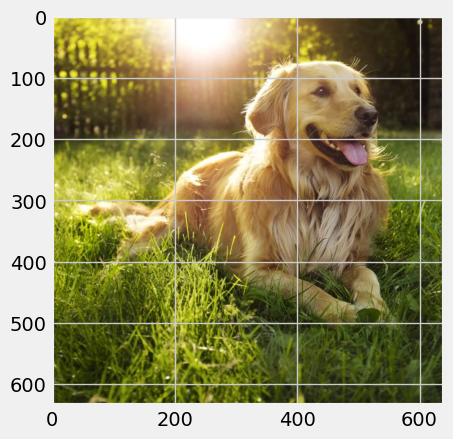

In [14]:
# Boiler plate code
import cv2
img = cv2.imread('dog.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# cv2_imshow(img)
img_size = img.shape

# Reshape it to be 2-dimension
X = img.reshape(img_size[0] * img_size[1], img_size[2])

# #Dimension of the original image
rows = img.shape[0]
cols = img.shape[1]
print("Original image  :  ")
plt.imshow(img)
img = img.reshape(rows*cols, 3)

#Implement k-means clustering to form k clusters
def image_Compression(k):
    kmeans = KMeans(n_clusters=k,init='k-means++', n_init=10)
    kmeans.fit(img)

    #Replace each pixel value with its nearby centroid
    compressed_image = kmeans.cluster_centers_[kmeans.labels_]
    compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

    #Reshape the image to original dimension
    compressed_image = compressed_image.reshape(rows, cols, 3)
    return compressed_image


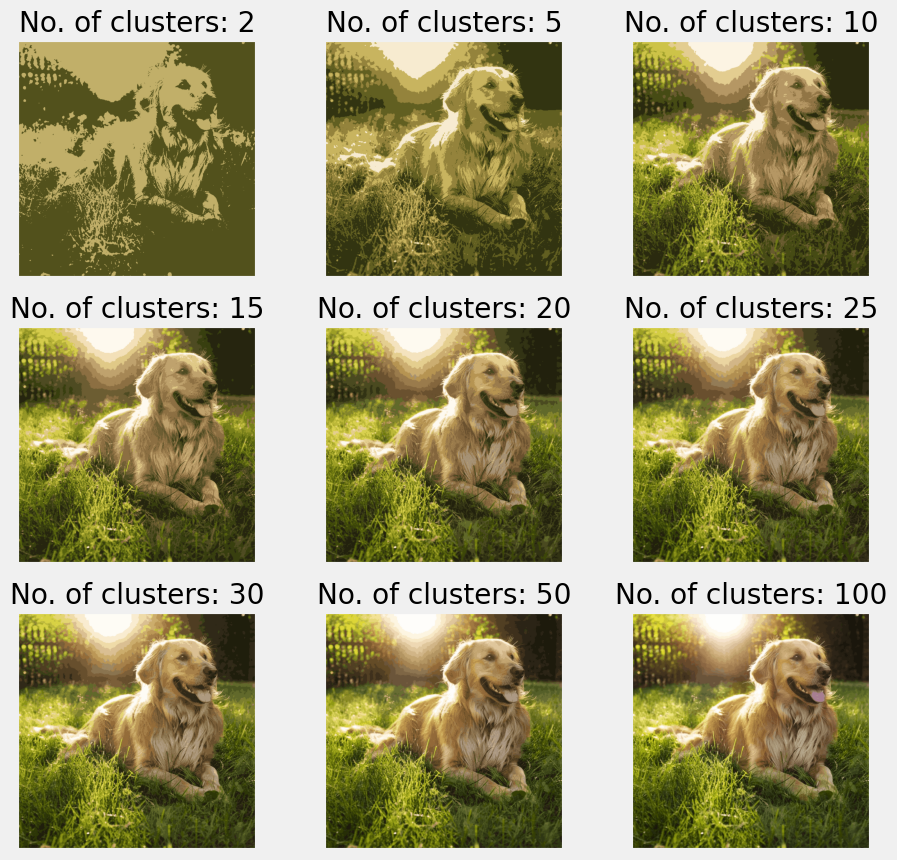

In [15]:
# When number of clusters = 2
no_of_clusters=[2,5,10,15,20,25,30,50,100]
com_images=[]
for i in range(len(no_of_clusters)):
    com_images.append(image_Compression(no_of_clusters[i]))
    
def show_images(images,label):
    fig, axes = plt.subplots(3, 3, figsize=(10, 10), subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.set_title("No. of clusters: "+str(label[i]))
    plt.show()
    
show_images(com_images,no_of_clusters)